In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [4]:
df.duplicated().sum()

np.int64(122)

In [5]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

property_type               society      sector  price  price_per_sqft  \
0          flat  tata gurgaon gateway  sector 113   3.21         11825.0   

     area                            areaWithType  bedRoom  bathroom balcony  \
0  2715.0  Super Built up area 2520(234.12 sq.m.)        3         3       3   

  additionalRoom  floorNum facing    agePossession  \
0  not available       9.0    NaN  0 to 1 Year Old   

                                                                                                                                                                                                                                                                                                         nearbyLocations  \
0  ['Dwarka Sector 21 Metro Station', 'Gurgaon Dreamz Mall', 'Dwarka Expressway', 'Delhi Jaipur Highway', 'Dwarka Expy', 'Red Roses Public School', 'The NorthCap University', 'Mount Carmel School', 'Metro Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'DLF Corporate Park', 'The Oberoi, Gurgaon']   

  furnishDetails  \
0            NaN   

                                                                                                                                                     features  
0  ['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']

## 1. areaWithType

In [6]:
df.sample(5)[['price','area','areaWithType']]

price    area  \
701    1.15  1550.0   
2616   4.45  1350.0   
3292   0.95  1550.0   
2575   1.82  1836.0   
2875   4.00  2905.0   

                                                                                                                areaWithType  
701      Super Built up area 1760(163.51 sq.m.)Built Up area: 1650 sq.ft. (153.29 sq.m.)Carpet area: 1550 sq.ft. (144 sq.m.)  
2616                                                                                             Plot area 150(125.42 sq.m.)  
3292                                                                                     Super Built up area 1550(144 sq.m.)  
2575  Super Built up area 1836(170.57 sq.m.)Built Up area: 1830 sq.ft. (170.01 sq.m.)Carpet area: 1500 sq.ft. (139.35 sq.m.)  
2875                                                                                  Super Built up area 2905(269.88 sq.m.)

In [7]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [8]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [9]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [10]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [11]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

price property_type    area  \
173    0.85          flat  1270.0   
1952   1.99          flat  1380.0   
2845   1.00          flat  2023.0   
1219   0.25          flat   482.0   
766    3.75          flat  2802.0   

                                                                                                                areaWithType  \
173                                             Super Built up area 1270(117.99 sq.m.)Carpet area: 1050 sq.ft. (97.55 sq.m.)   
1952  Super Built up area 1380(128.21 sq.m.)Built Up area: 1285 sq.ft. (119.38 sq.m.)Carpet area: 1280 sq.ft. (118.92 sq.m.)   
2845                                                                                  Super Built up area 2025(188.13 sq.m.)   
1219                                                                                       Carpet area: 481.73 (44.75 sq.m.)   
766                                                                                   Super Built up area 2802(260.31 sq.m.)   

      super_built_up_area  built_up_area  carpet_area  
173                1270.0            NaN  1050.000000  
1952               1380.0         1285.0  1280.000000  
2845               2025.0            NaN          NaN  
1219                  NaN            NaN   481.684525  
766                2802.0            NaN          NaN

In [12]:
df.duplicated().sum()

np.int64(122)

In [13]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [14]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

price property_type    area                  areaWithType  \
2     4.5         house  1152.0   Plot area 128(107.02 sq.m.)   
11    7.0         house  5400.0   Plot area 600(501.68 sq.m.)   
13    8.5         house  3240.0   Plot area 360(301.01 sq.m.)   
32   18.5         house  7000.0  Plot area 7000(650.32 sq.m.)   
39    1.5         house  1300.0  Plot area 1300(120.77 sq.m.)   

    super_built_up_area  built_up_area  carpet_area  
2                   NaN            NaN          NaN  
11                  NaN            NaN          NaN  
13                  NaN            NaN          NaN  
32                  NaN            NaN          NaN  
39                  NaN            NaN          NaN

In [15]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [16]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [17]:
all_nan_df.head()

price property_type    area                  areaWithType  \
2     4.5         house  1152.0   Plot area 128(107.02 sq.m.)   
11    7.0         house  5400.0   Plot area 600(501.68 sq.m.)   
13    8.5         house  3240.0   Plot area 360(301.01 sq.m.)   
32   18.5         house  7000.0  Plot area 7000(650.32 sq.m.)   
39    1.5         house  1300.0  Plot area 1300(120.77 sq.m.)   

    super_built_up_area  built_up_area  carpet_area  
2                   NaN            NaN          NaN  
11                  NaN            NaN          NaN  
13                  NaN            NaN          NaN  
32                  NaN            NaN          NaN  
39                  NaN            NaN          NaN

In [18]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [19]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [20]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [21]:
all_nan_df

price property_type      area                     areaWithType  \
2      4.50         house    1152.0      Plot area 128(107.02 sq.m.)   
11     7.00         house    5400.0      Plot area 600(501.68 sq.m.)   
13     8.50         house    3240.0      Plot area 360(301.01 sq.m.)   
32    18.50         house    7000.0     Plot area 7000(650.32 sq.m.)   
39     1.50         house    1300.0     Plot area 1300(120.77 sq.m.)   
55     8.50         house    3240.0      Plot area 360(301.01 sq.m.)   
57     9.00         house    3240.0      Plot area 360(301.01 sq.m.)   
62     4.00         house    1503.0      Plot area 167(139.63 sq.m.)   
63    15.10         house    8116.0                    Plot area 754   
67     7.35         house    1760.0      Plot area 240(200.67 sq.m.)   
90     0.75         house     600.0       Plot area 600(55.74 sq.m.)   
93     0.50         house     360.0        Plot area 40(33.45 sq.m.)   
107    8.95         house    5000.0     Plot area 5000(464.52 sq.m.)   
111    8.00         house    7000.0     Plot area 7000(650.32 sq.m.)   
118   12.00         house    3240.0      Plot area 360(301.01 sq.m.)   
127    8.81         house    3240.0      Plot area 360(301.01 sq.m.)   
129    1.15         house    1350.0      Plot area 150(125.42 sq.m.)   
135    0.70         house     999.0       Plot area 111(92.81 sq.m.)   
136    5.50         house    2546.0      Plot area 270(225.75 sq.m.)   
137    3.60         house    1836.0      Plot area 204(170.57 sq.m.)   
138    5.80         house    1800.0      Plot area 200(167.23 sq.m.)   
139    4.35         house    1350.0      Plot area 150(125.42 sq.m.)   
145    0.45         house     900.0       Plot area 900(83.61 sq.m.)   
157    8.50         house    4000.0     Plot area 4000(371.61 sq.m.)   
158    5.25         house    2610.0      Plot area 290(242.48 sq.m.)   
162   11.00         house    3096.0      Plot area 344(287.63 sq.m.)   
166    5.00         house    2367.0       Plot area 263(219.9 sq.m.)   
167    0.35         house     360.0        Plot area 40(33.45 sq.m.)   
188    2.25         house    1440.0      Plot area 160(133.78 sq.m.)   
196    9.00         house    4680.0      Plot area 520(434.79 sq.m.)   
217    0.70         house    1700.0     Plot area 1700(157.94 sq.m.)   
223    2.99         house    1449.0      Plot area 161(134.62 sq.m.)   
240    1.60         house     558.0        Plot area 62(51.84 sq.m.)   
241    0.42         house      50.0         Plot area 50(4.65 sq.m.)   
264    9.00         house    3240.0      Plot area 360(301.01 sq.m.)   
271    0.95         house     450.0       Plot area 450(41.81 sq.m.)   
274    3.10         house    3653.0     Plot area 3653(339.37 sq.m.)   
278    6.80         house    2160.0      Plot area 240(200.67 sq.m.)   
283    0.49         house     436.0       Plot area 360(33.45 sq.m.)   
289    0.37         house     360.0       Plot area 360(33.45 sq.m.)   
295    0.24         house     450.0       Plot area 450(41.81 sq.m.)   
301    3.15         house    1548.0      Plot area 172(143.81 sq.m.)   
302    4.60         house    1460.0     Plot area 1460(135.64 sq.m.)   
304    7.00         house    1783.0  Plot area 1782.72(165.62 sq.m.)   
312   10.50         house     402.0       Plot area 402(37.35 sq.m.)   
319    5.60         house    3240.0      Plot area 360(301.01 sq.m.)   
320    1.83         house    2700.0      Plot area 300(250.84 sq.m.)   
321    1.15         house     594.0        Plot area 66(55.18 sq.m.)   
324    8.31         house    3438.0       Plot area 382(319.4 sq.m.)   
329    0.40         house     450.0        Plot area 50(41.81 sq.m.)   
335    8.00         house    4518.0      Plot area 502(419.74 sq.m.)   
354   12.50         house    3078.0      Plot area 342(285.96 sq.m.)   
361    3.55         house    1449.0      Plot area 161(134.62 sq.m.)   
382    0.49         house    1150.0     Plot area 1150(106.84 sq.m.)   
388    6.75         house    2088.0      Plot 

In [22]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [23]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [24]:
all_nan_df

price property_type      area                     areaWithType  \
2      4.50         house    1152.0      Plot area 128(107.02 sq.m.)   
11     7.00         house    5400.0      Plot area 600(501.68 sq.m.)   
13     8.50         house    3240.0      Plot area 360(301.01 sq.m.)   
32    18.50         house    7000.0     Plot area 7000(650.32 sq.m.)   
39     1.50         house    1300.0     Plot area 1300(120.77 sq.m.)   
55     8.50         house    3240.0      Plot area 360(301.01 sq.m.)   
57     9.00         house    3240.0      Plot area 360(301.01 sq.m.)   
62     4.00         house    1503.0      Plot area 167(139.63 sq.m.)   
63    15.10         house    8116.0                    Plot area 754   
67     7.35         house    1760.0      Plot area 240(200.67 sq.m.)   
90     0.75         house     600.0       Plot area 600(55.74 sq.m.)   
93     0.50         house     360.0        Plot area 40(33.45 sq.m.)   
107    8.95         house    5000.0     Plot area 5000(464.52 sq.m.)   
111    8.00         house    7000.0     Plot area 7000(650.32 sq.m.)   
118   12.00         house    3240.0      Plot area 360(301.01 sq.m.)   
127    8.81         house    3240.0      Plot area 360(301.01 sq.m.)   
129    1.15         house    1350.0      Plot area 150(125.42 sq.m.)   
135    0.70         house     999.0       Plot area 111(92.81 sq.m.)   
136    5.50         house    2546.0      Plot area 270(225.75 sq.m.)   
137    3.60         house    1836.0      Plot area 204(170.57 sq.m.)   
138    5.80         house    1800.0      Plot area 200(167.23 sq.m.)   
139    4.35         house    1350.0      Plot area 150(125.42 sq.m.)   
145    0.45         house     900.0       Plot area 900(83.61 sq.m.)   
157    8.50         house    4000.0     Plot area 4000(371.61 sq.m.)   
158    5.25         house    2610.0      Plot area 290(242.48 sq.m.)   
162   11.00         house    3096.0      Plot area 344(287.63 sq.m.)   
166    5.00         house    2367.0       Plot area 263(219.9 sq.m.)   
167    0.35         house     360.0        Plot area 40(33.45 sq.m.)   
188    2.25         house    1440.0      Plot area 160(133.78 sq.m.)   
196    9.00         house    4680.0      Plot area 520(434.79 sq.m.)   
217    0.70         house    1700.0     Plot area 1700(157.94 sq.m.)   
223    2.99         house    1449.0      Plot area 161(134.62 sq.m.)   
240    1.60         house     558.0        Plot area 62(51.84 sq.m.)   
241    0.42         house      50.0         Plot area 50(4.65 sq.m.)   
264    9.00         house    3240.0      Plot area 360(301.01 sq.m.)   
271    0.95         house     450.0       Plot area 450(41.81 sq.m.)   
274    3.10         house    3653.0     Plot area 3653(339.37 sq.m.)   
278    6.80         house    2160.0      Plot area 240(200.67 sq.m.)   
283    0.49         house     436.0       Plot area 360(33.45 sq.m.)   
289    0.37         house     360.0       Plot area 360(33.45 sq.m.)   
295    0.24         house     450.0       Plot area 450(41.81 sq.m.)   
301    3.15         house    1548.0      Plot area 172(143.81 sq.m.)   
302    4.60         house    1460.0     Plot area 1460(135.64 sq.m.)   
304    7.00         house    1783.0  Plot area 1782.72(165.62 sq.m.)   
312   10.50         house     402.0       Plot area 402(37.35 sq.m.)   
319    5.60         house    3240.0      Plot area 360(301.01 sq.m.)   
320    1.83         house    2700.0      Plot area 300(250.84 sq.m.)   
321    1.15         house     594.0        Plot area 66(55.18 sq.m.)   
324    8.31         house    3438.0       Plot area 382(319.4 sq.m.)   
329    0.40         house     450.0        Plot area 50(41.81 sq.m.)   
335    8.00         house    4518.0      Plot area 502(419.74 sq.m.)   
354   12.50         house    3078.0      Plot area 342(285.96 sq.m.)   
361    3.55         house    1449.0      Plot area 161(134.62 sq.m.)   
382    0.49         house    1150.0     Plot area 1150(106.84 sq.m.)   
388    6.75         house    2088.0      Plot 

In [25]:
df.head()

property_type                society      sector  price  price_per_sqft  \
0          flat   tata gurgaon gateway  sector 113   3.21         11825.0   
1          flat     ambience creacions   sector 22   1.99         15546.0   
2         house            independent   sector 43   4.50         39062.0   
3          flat   shree vardhman flora   sector 90   0.65          6789.0   
4          flat  ss radiance residency   sector 12   0.60          5660.0   

     area  \
0  2715.0   
1  1280.0   
2  1152.0   
3   957.0   
4  1060.0   

                                                                                                             areaWithType  \
0                                                                                  Super Built up area 2520(234.12 sq.m.)   
1  Super Built up area 1380(128.21 sq.m.)Built Up area: 1285 sq.ft. (119.38 sq.m.)Carpet area: 1280 sq.ft. (118.92 sq.m.)   
2                                                                                             Plot area 128(107.02 sq.m.)   
3     Super Built up area 1350(125.42 sq.m.)Built Up area: 1050 sq.ft. (97.55 sq.m.)Carpet area: 950 sq.ft. (88.26 sq.m.)   
4                                                                                         Carpet area: 1060 (98.48 sq.m.)   

   bedRoom  bathroom balcony additionalRoom  floorNum      facing  \
0        3         3       3  not available       9.0         NaN   
1        2         2       2  not available       9.0  North-East   
2       20        20      3+   servant room       4.0        East   
3        2         2       3     study room       9.0  South-East   
4        3         3       2  not available       3.0  North-East   

     agePossession  \
0  0 to 1 Year Old   
1  0 to 1 Year Old   
2  1 to 5 Year Old   
3  1 to 5 Year Old   
4  1 to 5 Year Old   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            nearbyLocations  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [26]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [27]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

additionalRoom  study room  servant room  store room  pooja room  \
1482       servant room           0             1           0           0   
1143      not available           0             0           0           0   
1237         store room           0             0           1           0   
1180       servant room           0             1           0           0   
2833  pooja room,others           0             0           0           1   

      others  
1482       0  
1143       0  
1237       0  
1180       0  
2833       1

In [28]:
df.head()

property_type                society      sector  price  price_per_sqft  \
0          flat   tata gurgaon gateway  sector 113   3.21         11825.0   
1          flat     ambience creacions   sector 22   1.99         15546.0   
2         house            independent   sector 43   4.50         39062.0   
3          flat   shree vardhman flora   sector 90   0.65          6789.0   
4          flat  ss radiance residency   sector 12   0.60          5660.0   

     area  \
0  2715.0   
1  1280.0   
2  1152.0   
3   957.0   
4  1060.0   

                                                                                                             areaWithType  \
0                                                                                  Super Built up area 2520(234.12 sq.m.)   
1  Super Built up area 1380(128.21 sq.m.)Built Up area: 1285 sq.ft. (119.38 sq.m.)Carpet area: 1280 sq.ft. (118.92 sq.m.)   
2                                                                                             Plot area 128(107.02 sq.m.)   
3     Super Built up area 1350(125.42 sq.m.)Built Up area: 1050 sq.ft. (97.55 sq.m.)Carpet area: 950 sq.ft. (88.26 sq.m.)   
4                                                                                         Carpet area: 1060 (98.48 sq.m.)   

   bedRoom  bathroom balcony additionalRoom  floorNum      facing  \
0        3         3       3  not available       9.0         NaN   
1        2         2       2  not available       9.0  North-East   
2       20        20      3+   servant room       4.0        East   
3        2         2       3     study room       9.0  South-East   
4        3         3       2  not available       3.0  North-East   

     agePossession  \
0  0 to 1 Year Old   
1  0 to 1 Year Old   
2  1 to 5 Year Old   
3  1 to 5 Year Old   
4  1 to 5 Year Old   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            nearbyLocations  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

## 3.agePossession

In [30]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Dec 2025                 7
Jun 2024                 7
Aug 2023                 7
Nov 2023                 5
By 2025                  4
Jul 2024                 4
Sep 2023                 4
Oct 2023                 4
Aug 2024                 4
Feb 2024                 3
May 2024                 3
Jan 2025                 3
Nov 2024                 3
Aug 2025                 2
Oct 2025                 2
Jul 2027                 2
Sep 2025                 2
Jun 2027                 2
By 2027                  2
Jan 2026                 2
Dec 2026                 2
Mar 2025      

In [31]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [32]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [33]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [34]:
df.head()

property_type                society      sector  price  price_per_sqft  \
0          flat   tata gurgaon gateway  sector 113   3.21         11825.0   
1          flat     ambience creacions   sector 22   1.99         15546.0   
2         house            independent   sector 43   4.50         39062.0   
3          flat   shree vardhman flora   sector 90   0.65          6789.0   
4          flat  ss radiance residency   sector 12   0.60          5660.0   

     area  \
0  2715.0   
1  1280.0   
2  1152.0   
3   957.0   
4  1060.0   

                                                                                                             areaWithType  \
0                                                                                  Super Built up area 2520(234.12 sq.m.)   
1  Super Built up area 1380(128.21 sq.m.)Built Up area: 1285 sq.ft. (119.38 sq.m.)Carpet area: 1280 sq.ft. (118.92 sq.m.)   
2                                                                                             Plot area 128(107.02 sq.m.)   
3     Super Built up area 1350(125.42 sq.m.)Built Up area: 1050 sq.ft. (97.55 sq.m.)Carpet area: 950 sq.ft. (88.26 sq.m.)   
4                                                                                         Carpet area: 1060 (98.48 sq.m.)   

   bedRoom  bathroom balcony additionalRoom  floorNum      facing  \
0        3         3       3  not available       9.0         NaN   
1        2         2       2  not available       9.0  North-East   
2       20        20      3+   servant room       4.0        East   
3        2         2       3     study room       9.0  South-East   
4        3         3       2  not available       3.0  North-East   

    agePossession  \
0    New Property   
1    New Property   
2  Relatively New   
3  Relatively New   
4  Relatively New   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            nearbyLocations  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

## 4.furnishDetails

In [35]:
df.sample(5)[['furnishDetails','features']]

furnishDetails  \
1646         ['5 Fan', '1 Exhaust Fan', '6 Geyser', '1 Stove', '10 Light', '6 AC', '1 Modular Kitchen', '1 Chimney', '4 Wardrobe', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']   
3635                                                                                                                                                                                                                                                                    []   
138   ['5 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']   
2399                                                                                                                                                                                                                                                                   NaN   
2078                                                                                                                                                                                                                                                                   NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                    features  
1646  ['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']  
3635                                                                                                                                                                                                                                                                                                                                                                                                                     NaN  
138                                                                                                                                                                                                                                                                                                                                                                ['False Ceiling Lighting', 'Park', 'Low Density Society']  
2399                                                                                                                                                                 ['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'Separate entry for servant room', 'Bank Attached Property', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']  
2078                                                                                                                                                                                                                                                                                 ['Power Back-up', 'Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']

In [36]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


In [37]:
furnishings_df.shape

(3803, 19)

In [38]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\nitis\AppData\Local\Temp\ipykernel_11212\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [39]:
furnishings_df.sample(5)

Microwave  Modular Kitchen  TV  Exhaust Fan  Light  Chimney  Fridge  AC  \
3486          0                0   0            1      5        0       0   0   
649           0                1   0            1     15        1       0   4   
889           0                0   0            0      0        0       0   0   
766           0                1   0            0      0        1       0   5   
3760          0                1   0            1     15        1       0   6   

      Curtains  Dining Table  Wardrobe  Sofa  Fan  Water Purifier  \
3486         3             0         0     0    1               0   
649          1             0         3     0    5               1   
889          0             0         0     0    0               0   
766          0             0         0     0    0               1   
3760         0             1         6     0    6               1   

      Washing Machine  Bed  Stove  Geyser  
3486                0    0      0       1  
649                 0    0      1       3  
889                 0    0      0       0  
766                 0    0      0       4  
3760                0    0      1       4

In [40]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [42]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

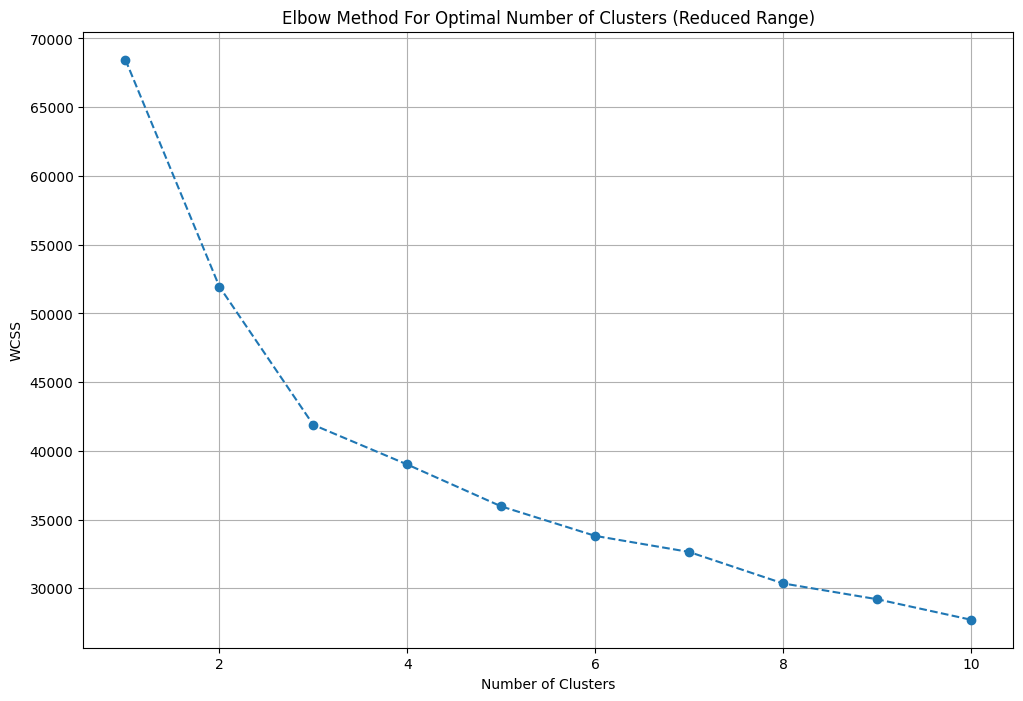

In [43]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [44]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [45]:
df = df.iloc[:,:-18]

In [46]:
df['furnishing_type'] = cluster_assignments

In [47]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

furnishDetails  \
208   ['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']   
816        ['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Geyser', '21 Light', '1 Modular Kitchen', '1 Curtains', '1 Chimney', '5 AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']   
1428     ['1 Water Purifier', '11 Geyser', '1 Stove', '8 Light', '8 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine']   
349                                                                                                                                                                                                                                                                  NaN   
1670                                                                                                                                                                                                                                                                 NaN   

      furnishing_type  
208                 1  
816                 0  
1428                0  
349                 1  
1670                1

## 5.features

In [48]:
df[['society','features']].sample(5)

society  \
1235           dlf the primus   
3346               godrej air   
2903  sare green parc phase 3   
2636           bhagwati sadan   
506    bestech park view city   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 features  
1235                                                                                                                                                                                                                                                                                                                                                ['Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']  
3346                                                                                                                                                                                                                                                                                                                                                           ['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']  
2903                         ['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Club house / Community Center', 'Water softening plant']  
2636                                                                                                                                                                                                                                                                                                                                                                             ['Feng Shui / Vaastu Compliant', 'Visitor Parking', 'Security Personnel', 'Internet/wi-fi connectivity']  
506   ['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']

In [49]:
df['features'].isnull().sum()

np.int64(635)

In [50]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

PropertyName                               PropertySubName  \
0  Smartworld One DXP  2, 3, 4 BHK Apartment in Sector 113, Gurgaon   
1           M3M Crown     3, 4 BHK Apartment in Sector 111, Gurgaon   

                                                                                                                                  NearbyLocations  \
0                                           ['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']   
1  ['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    LocationAdvantages  \
0         {'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}   
1  {'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}   

                                                                          Link  \
0  https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415   
1           https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068   

                                                                                                                                                                                                                                                                                                                                                                                           PriceDetails  \
0  {'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}   
1                                                                                                       {'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}   

                                                                                                                                   TopFacilities  
0                     ['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']  
1  ['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']

In [51]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [52]:
temp_df = df[df['features'].isnull()]

In [53]:
temp_df.shape

(635, 26)

In [54]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [55]:
df.loc[temp_df.index,'features'] = x.values

In [56]:
df['features'].isnull().sum()

np.int64(481)

In [57]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [58]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [59]:
features_binary_df.sample(5)

24/7 Power Backup  24/7 Water Supply  24x7 Security  ATM  \
2748                  0                  0              0    0   
2903                  0                  0              0    0   
2592                  0                  0              0    0   
2367                  0                  0              0    0   
3792                  0                  0              0    0   

      Aerobics Centre  Air Hockey  Airy Rooms  Amphitheatre  \
2748                0           0           1             0   
2903                0           0           1             0   
2592                0           0           0             0   
2367                0           0           1             0   
3792                0           0           0             0   

      Automated Car Wash  Badminton Court  Bank Attached Property  \
2748                   0                0                       0   
2903                   0                0                       0   
2592                   0                0                       0   
2367                   0                0                       0   
3792                   0                0                       0   

      Banquet Hall  Bar/Chill-Out Lounge  Barbecue  Basketball Court  \
2748             0                     0         0                 0   
2903             0                     0         0                 0   
2592             0                     0         0                 0   
2367             0                     0         0                 0   
3792             0                     0         0                 0   

      Beach Volley Ball Court  Billiards  Bowling Alley  Bus Shelter  \
2748                        0          0              0            0   
2903                        0          0              0            0   
2592                        0          0              0            0   
2367                        0          0              0            0   
3792                        0          0              0            0   

      Business Lounge  CCTV Camera Security  Cafeteria  Car Parking  \
2748                0                     0          0            0   
2903                0                     0          0            0   
2592                0                     0          0            0   
2367                0                     0          0            0   
3792                0                     0          0            0   

      Car wash area  Card Room  Centrally Air Conditioned  Changing Area  \
2748              0          0                          1              0   
2903              0          0                          0              0   
2592              0          0                          0              0   
2367              0          0                          0              0   
3792              0          0                          0              0   

      Children's Play Area  Cigar Lounge  Clinic  Club House  \
2748                     0             0       0           0   
2903                     0             0       0           0   
2592                     0             0       0           0   
2367                     0             0       0           0   
3792                     0             0       0           0   

      Club house / Community Center  Community Hall  Concierge Service  \
2748                              1               0                  0   
2903                              1               0                  0   
2592                              1               0                  0   
2367                              1               0                  0   
3792                              0               0                  0   

      Conference room  Creche/Day care  Cricket Pitch  Doctor on Call  \
2748                0                0              0               0   
2903                0                0              0               0   
2592            

In [60]:
features_binary_df.shape

(3803, 130)

In [61]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

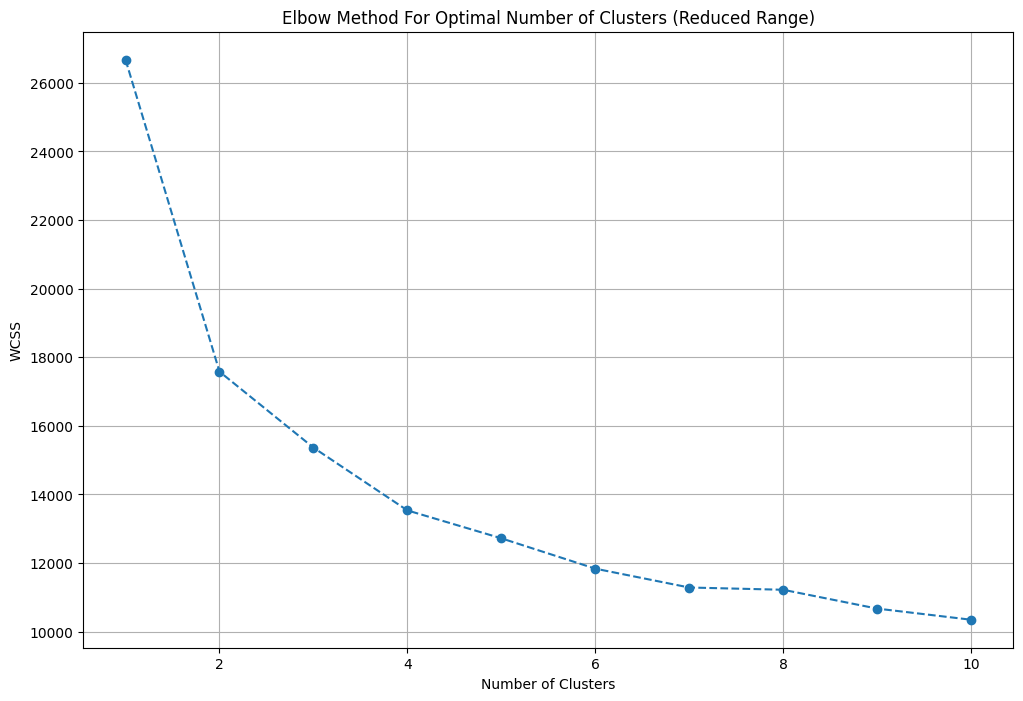

In [62]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [63]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [64]:
df['luxury_score'] = luxury_score

In [65]:
df.head()

property_type                society      sector  price  price_per_sqft  \
0          flat   tata gurgaon gateway  sector 113   3.21         11825.0   
1          flat     ambience creacions   sector 22   1.99         15546.0   
2         house            independent   sector 43   4.50         39062.0   
3          flat   shree vardhman flora   sector 90   0.65          6789.0   
4          flat  ss radiance residency   sector 12   0.60          5660.0   

     area  \
0  2715.0   
1  1280.0   
2  1152.0   
3   957.0   
4  1060.0   

                                                                                                             areaWithType  \
0                                                                                  Super Built up area 2520(234.12 sq.m.)   
1  Super Built up area 1380(128.21 sq.m.)Built Up area: 1285 sq.ft. (119.38 sq.m.)Carpet area: 1280 sq.ft. (118.92 sq.m.)   
2                                                                                             Plot area 128(107.02 sq.m.)   
3     Super Built up area 1350(125.42 sq.m.)Built Up area: 1050 sq.ft. (97.55 sq.m.)Carpet area: 950 sq.ft. (88.26 sq.m.)   
4                                                                                         Carpet area: 1060 (98.48 sq.m.)   

   bedRoom  bathroom balcony additionalRoom  floorNum      facing  \
0        3         3       3  not available       9.0         NaN   
1        2         2       2  not available       9.0  North-East   
2       20        20      3+   servant room       4.0        East   
3        2         2       3     study room       9.0  South-East   
4        3         3       2  not available       3.0  North-East   

    agePossession  \
0    New Property   
1    New Property   
2  Relatively New   
3  Relatively New   
4  Relatively New   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            nearbyLocations  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [66]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [67]:
df.sample(5)

property_type                   society      sector  price  \
2400         house               independent    sector 7   0.69   
1486          flat                paras dews  sector 106   1.10   
300           flat               m3m heights   sector 65   2.25   
3032          flat  unitech uniworld gardens   sector 47   1.05   
981           flat    breez global hill view  sohna road   0.32   

      price_per_sqft    area  \
2400          9103.0   758.0   
1486          9734.0  1130.0   
300          13608.0  1653.0   
3032         10531.0   997.0   
981           5470.0   585.0   

                                                                                                                areaWithType  \
2400                                                   Built Up area: 758 (70.42 sq.m.)Carpet area: 500 sq.ft. (46.45 sq.m.)   
1486  Super Built up area 1760(163.51 sq.m.)Built Up area: 1186 sq.ft. (110.18 sq.m.)Carpet area: 1130 sq.ft. (104.98 sq.m.)   
300                                                                                         Carpet area: 1433 (133.13 sq.m.)   
3032                                                                                          Carpet area: 997 (92.62 sq.m.)   
981                                                    Built Up area: 1000 (92.9 sq.m.)Carpet area: 585 sq.ft. (54.35 sq.m.)   

      bedRoom  bathroom balcony  floorNum      facing       agePossession  \
2400        1         1       1       2.0         NaN           Undefined   
1486        3         4      3+       8.0  North-West      Relatively New   
300         2         2       3       5.0         NaN  Under Construction   
3032        2         2       2       3.0  North-East      Relatively New   
981         2         2       1      17.0         NaN        New Property   

      super_built_up_area  built_up_area  carpet_area  study room  \
2400                  NaN          758.0        500.0           0   
1486               1760.0         1186.0       1130.0           0   
300                   NaN            NaN       1433.0           0   
3032                  NaN            NaN        997.0           0   
981                   NaN         1000.0        585.0           0   

      servant room  store room  pooja room  others  furnishing_type  \
2400             0           0           0       0                1   
1486             1           0           0       0                0   
300              0           0           0       0                1   
3032             0           0           0       0                0   
981              0           0           0       0                1   

      luxury_score  
2400             0  
1486           174  
300             48  
3032            34  
981             49

In [68]:
df.shape

(3803, 23)

In [69]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)